# Ultimate Technologies Take-Home Challenge

## Part 1: Exploratory Data Analysis

Let's begin by observing a few datapoints within the `logins` dataset.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
login_data = pd.read_json('logins.json')
login_data.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


### Aggregation

In [5]:
# Aggregates by time interval given a dataframe with timestamps 
def aggregate_by_time_interval(dataframe, column_name=None, freq='15min'):
    df = dataframe.copy()
    if (column_name == None):
        column_name = df.columns[0] # When no column_name is given, use first column
    df.set_index(column_name, inplace=True)
    df['count'] = 1
    df = df.resample(freq).sum()
    df = df.reset_index()
    return df

In [32]:
login_data_aggregated = aggregate_by_time_interval(login_data)
login_data_aggregated.head(10)

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


### Visualization

#### High level view
Observing the plot below, we can visually inspect the rhythmic nature of login activity. We can zoom in closer to observe the plot more closely and see if we can identify any patterns.

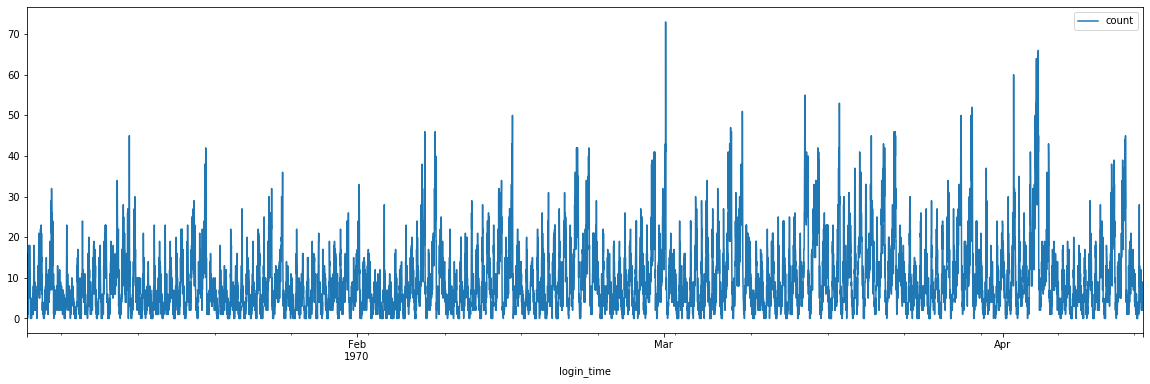

In [8]:
login_data_aggregated.plot(x='login_time', y='count', figsize=(20,6))
plt.show()

#### Closer view
The plot below shows login activity during the month of January 1970. Upon observation, it appears that login activity spikes during midnight and noon starting from Tuesday at noon to Sunday at midnight. Sundays and Mondays appear to have low activity.

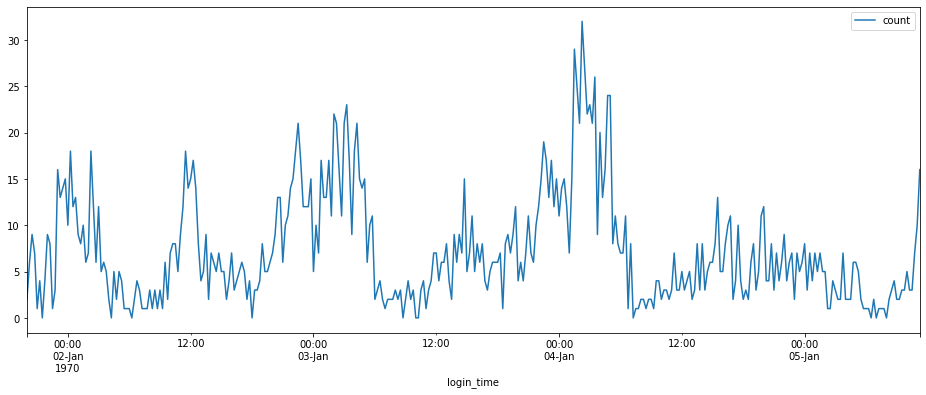

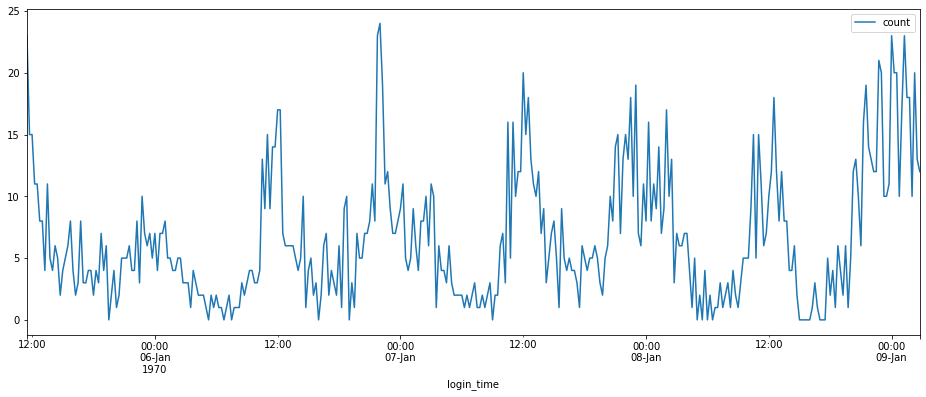

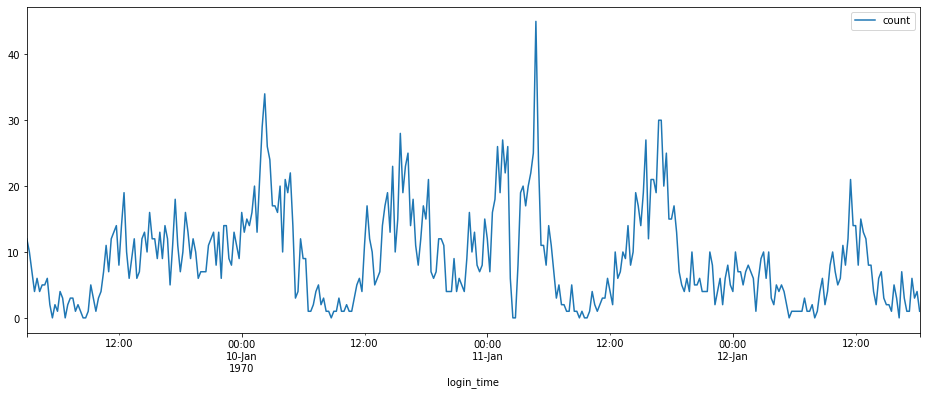

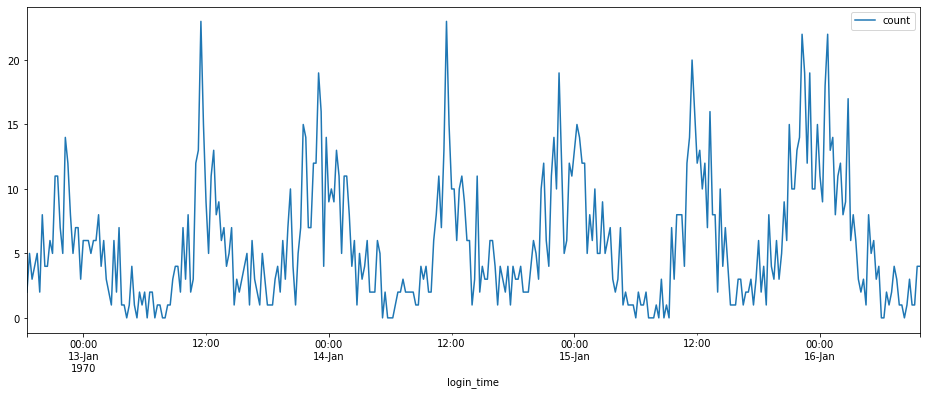

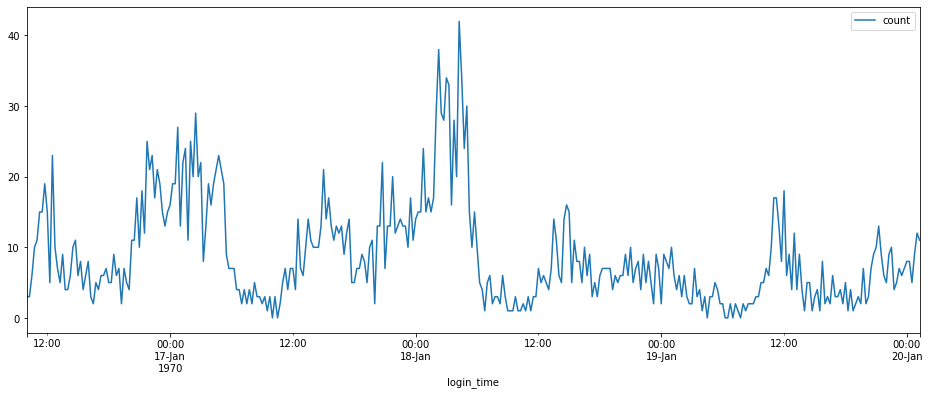

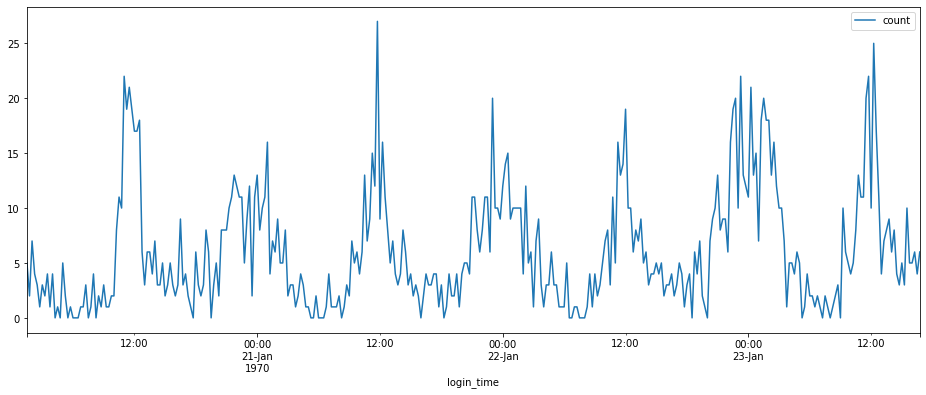

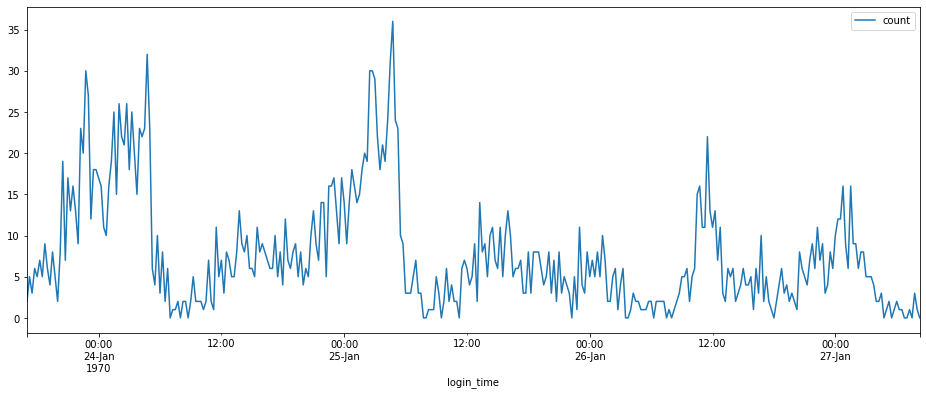

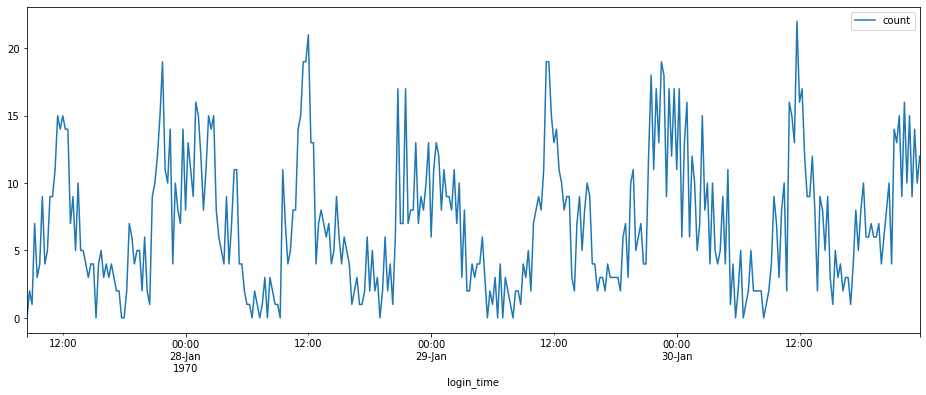

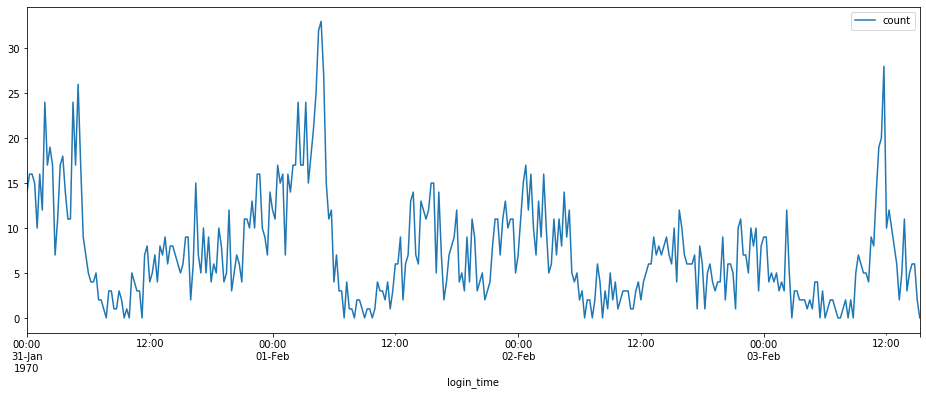

In [33]:
step_size = 350
for i in range(9):
    login_data_aggregated.iloc[i*step_size:(i+1)*step_size,:].plot(x='login_time', y='count', figsize=(16,6))
    plt.show()

## Part 2: Experiment and Metrics Design
### Required data
In order to design an experiment, we'll assume that we are able to obtain toll-bridge data. In particular, we'll assume that for each toll collected at the toll bridge, we'll have the following two pieces of information:
- Time of day when the toll was collected
- The direction of the travelling vehicle (Metropolis -> Gotham or Gotham -> Metropolis). For reference, we'll label Metropolis -> Gotham as `direction A` and Gotham -> Metropolis as `direction B`.

### High level overview of the experiment
The idea behind collecting this data is the following: if the city's reimbursement proposal is successful, then the patterns found in the toll bridge data should closely mimic the patterns in user login data.

We know that Gotham is most active at night and Metropolis is most active during the day. This is also reflected on the login data explored in Part 1—there's a surge of demand at noon (which must resemeble activity in Metropolis) and another surge of demand at midnight (which must resemble activity in Gotham). If the reimbursement proposal works, we should see a rise in toll activity in exactly those same periods of time. Furthermore, the rise in toll we observe should also reflect the direction that we expect that drivers would take. For instance, we expect that most drivers in metropolis would be starting their day before noon and end their day after noon. Hence, we should see a rise in toll activity in direction A before noon and another rise in toll activity in direction B after noon. Similarly, for Gotham, we should see a rise in toll activity in direction B before midnight and a rise in toll activity in direction A after midnight.

### Implementation
The experiment should go as following: we would collect toll data for four weeks without offering reimbursement. Then we begin offering reimbursement and collect the same data for another four weeks. We then compare the two sets of data before and after reimbursement. Plotting the data the same way as we did in Part 1, we can verify if our hypothesis of rise in toll is correct.

## Part 3: Predictive Modeling
Let's begin, once again, by observing the given dataset.

In [35]:
import json

with open('ultimate_data_challenge.json', 'r') as f:
    content = json.load(f)
    
ultimate_data = pd.DataFrame(content)
ultimate_data.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


We can see that this dataset contains rider's trips. Each row in the dataset resembles a trip that a rider has taken and the characteristics of that rider. We can use this dataset to build a set of features that we suspect may be useful in predicting user retention.

### Cleaning dataset

#### Building the target
Let's first build the target. Our target are active users, where an active user is defined by a rider who has taken a trip within the last 30 days. We'll look at the last date in the `last_trip_date` column and use that as our "current date".

In [278]:
ultimate_data.last_trip_date.max() 

# the lastest last trip date for this dataset was 2014-07-01
# so we'll define a user as active if they took a trip within 30 days before this date

'2014-07-01'

It appears that the most recent date in `last_trip_date` was 2014-07-01. Since the month before (June) has 30 calendar days, we can define, for our purposes, a user as `active` if they took a trip anywhere between June 1st and July 1st. This will be our target. 

In [279]:
df = ultimate_data.copy()

In [284]:
target = (df.last_trip_date < '2014-06-01').astype(int)
target.name = 'target'
target

0        0
1        1
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: target, Length: 50000, dtype: int32

#### Building the features

Looking at the raw dataset, there are a list of things we need to do before we can use it to train a predictive model.
- Apply one-hot-encoding to city
- Define a feature `days_active` as the length of time a user has had an account: `last_trip_date` - `signup_date`
- Handle null values
- Convert phone to binary values
- Convert `ultimate_black_user` to binary values
- Drop these raw columns: `city`, `signup_date`, `last_trip_date`
- Combine clean raw data, new features, and target to create a clean dataset

##### City

In [286]:
df.city.unique().tolist()

["King's Landing", 'Astapor', 'Winterfell']

Notice that we have 3 cities. So we'll create one column for each city (ideally, we'd drop the first column to maintain linear dependence, but due to practicality, we won't worry about it in this case).

In [208]:
city_one_hot = pd.get_dummies(df.city)

##### Days Active

In [209]:
days_active = pd.to_datetime(df.last_trip_date).subtract(pd.to_datetime(df.signup_date)) / np.timedelta64(1, 'D')
days_active.name = 'days_active'

##### Handling Null Values and Converting Phone to Binary Values

We have 3 columns with `null` values: `avg_rating_of_driver`, `phone`, `avg_rating_by_driver`. We can fill the `null` values in the rating columns with their respective mean values. This way, the rating distributions are uneffected by this change. For `phone`, we only have 396 datapoints with `None` values. Hence, we can simply redefine this feature as a user who is using an iPhone or not using an iPhone. We don't expect that this change will alter our results to any significant degree.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [211]:
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [213]:
df.phone = pd.get_dummies(df.phone, drop_first=True)

##### Converting Ultimate Black User to Binary Values

In [214]:
df.ultimate_black_user = (df.ultimate_black_user).astype(int)

##### Dropping Unusable Columns

In [215]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,1,0.0,0,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,1,0.0,0,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,0,0.0,1,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,1,0.0,0,100.0,4.58,3.5


In [216]:
df = df.drop(columns=['city', 'signup_date', 'last_trip_date'])

In [217]:
df

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.700000,1.10,1,15.4,1,46.2,3.67,5.0
1,0,5.000000,1.00,0,0.0,0,50.0,8.26,5.0
2,3,4.300000,1.00,1,0.0,0,100.0,0.77,5.0
3,9,4.600000,1.14,1,20.0,1,80.0,2.36,4.9
4,14,4.400000,1.19,0,11.8,0,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,1,0.0,0,100.0,5.63,4.2
49996,1,4.601559,1.00,1,0.0,0,0.0,0.00,4.0
49997,0,5.000000,1.00,0,0.0,1,100.0,3.86,5.0
49998,2,3.000000,1.00,1,0.0,0,100.0,4.58,3.5


##### Concatenating All Features into a Clean Dataset

In [228]:
dataset = pd.concat([df, city_one_hot, days_active, target], axis=1)

In [229]:
dataset.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,days_active,target
0,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,0,1,0,143.0,0
1,0,5.0,1.00,0,0.0,0,50.0,8.26,5.0,1,0,0,96.0,1
2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,1,0,0,1.0,1
3,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,0,1,0,170.0,0
4,14,4.4,1.19,0,11.8,0,82.4,3.13,4.9,0,0,1,47.0,1


### Training a Predictive Model
To discover useful features, we can train a reasonable model and observe their feature weights to determine which feature contributes the most to predicting user retention.

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [245]:
# Preprocessing
x = dataset.iloc[:,:-1].values
y = dataset.target.values

# Feature scaling
sc = StandardScaler()
x = sc.fit_transform(x)

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [247]:
# Training model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [288]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', model.score(x_test, y_test))
print('AUC:', roc_auc_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)

Accuracy: 0.96
AUC: 0.958507288887172
Confusion Matrix:
[[3484  172]
 [ 228 6116]]


In [270]:
model_weights = pd.DataFrame({'features' : dataset.iloc[:,:-1].columns.tolist(), 'weights' : model.coef_.tolist()[0]})

In [275]:
model_weights.sort_values(by='weights')

,features,weights
12,days_active,-12.323493
10,King's Landing,-0.434599
5,ultimate_black_user,-0.378132
3,phone,-0.345458
0,trips_in_first_30_days,-0.232712
2,avg_surge,-0.064270
7,avg_dist,0.008006
1,avg_rating_of_driver,0.039946
8,avg_rating_by_driver,0.055655
4,surge_pct,0.083640


### Leveraging the Results

Based on our analysis, it appears that the most prominent variable in predicting user retention is the length of time that a user has had an account. This implies that a rider who is riding with Ultimate is likely to continue riding with Ultimate.

This insight allows managers of Ultimate to focus their marketing strategy to keep a user active within the platform. Possible marketing implementations include creating a reward system that provides a user with gifts and/or rewards from reaching activity milestones (e.g. two free rides after one month of activity; obtaining points after each ride, which can be used to purchase free rides etc.)